Old data frame length: 31571


C:\Users\INDUS\AppData\Local\Temp\ipykernel_9936\3088447156.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


Data cleaned frame length: 29026
**Data Description After Eliminating 'NOT APPLICABLE' Values**
                Year       Economy Economy Label  Absolute value in thousands  \
count   29026.000000  29026.000000         29026                 2.902600e+04   
unique           NaN           NaN           312                          NaN   
top              NaN           NaN   Afghanistan                          NaN   
freq             NaN           NaN           101                          NaN   
mean     2001.223283   1117.715703           NaN                 2.761754e+05   
std        29.039084   1571.632758           NaN                 8.983776e+05   
min      1950.000000      0.000000           NaN                 5.100000e-01   
25%      1976.000000    270.000000           NaN                 6.305602e+02   
50%      2002.000000    558.000000           NaN                 8.600323e+03   
75%      2026.000000    840.000000           NaN                 6.514000e+04   
max      2050

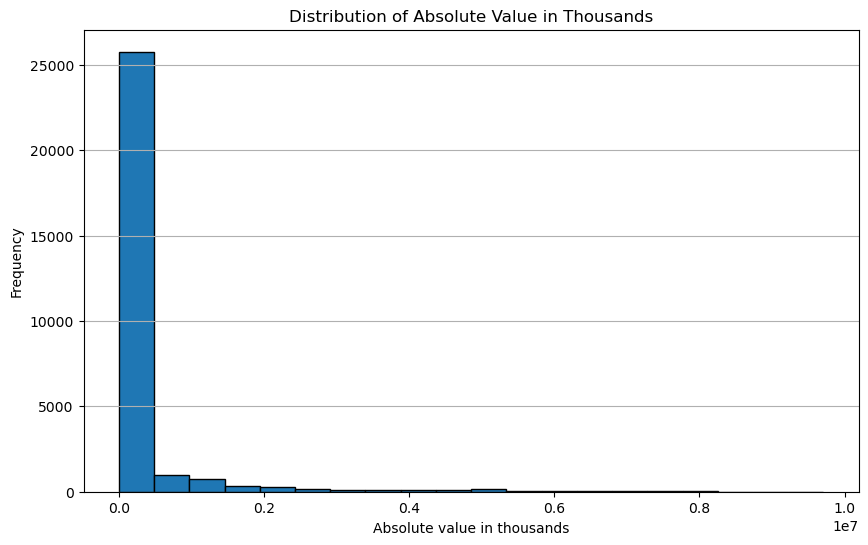

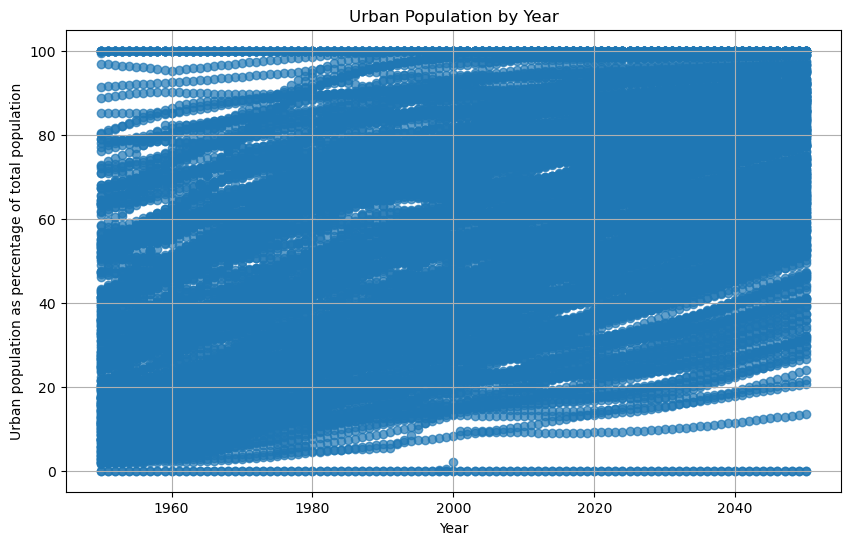

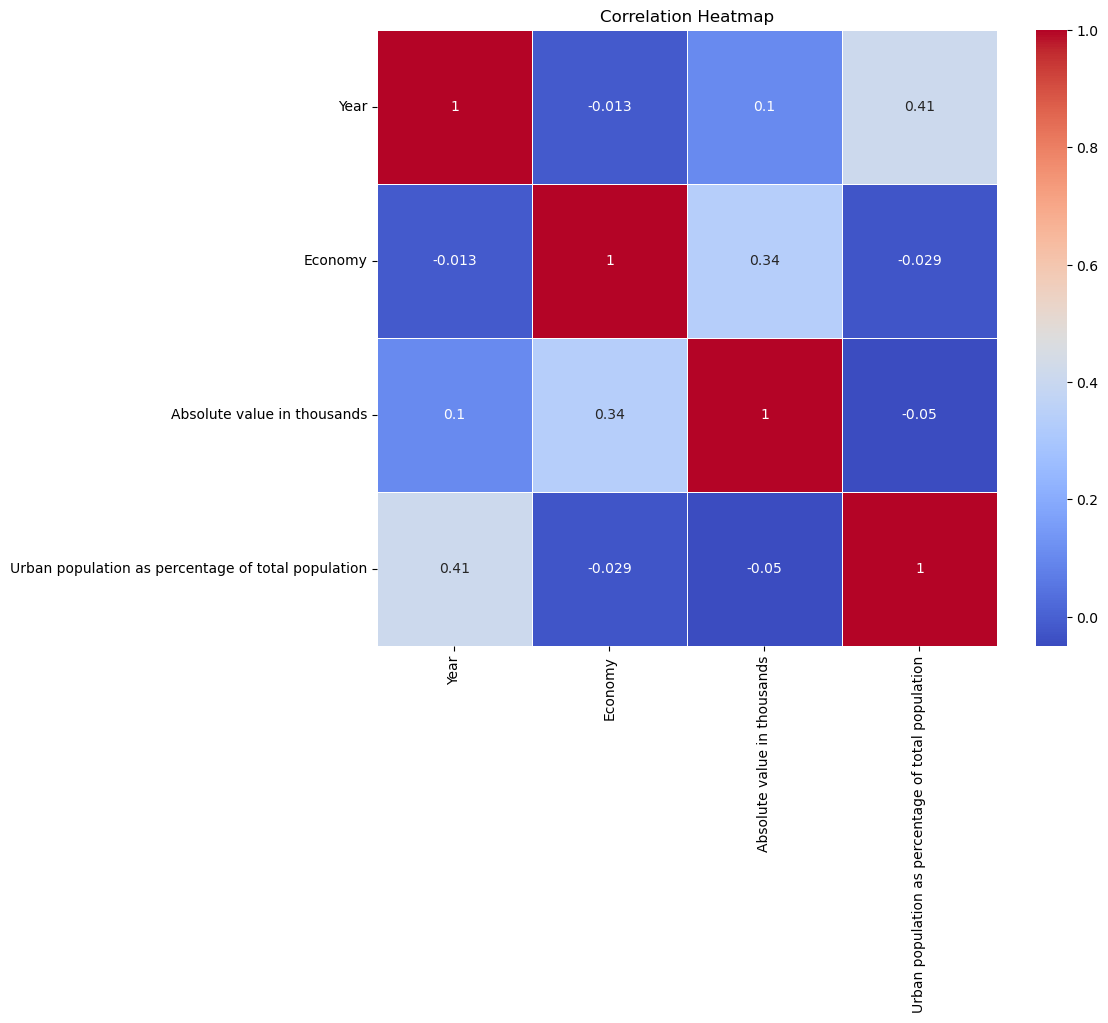

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/INDUS/Downloads/dataset.csv")

print("Old data frame length:", len(df))
df.replace("NOT APPLICABLE", pd.NA, inplace=True)
df_cleaned = df.dropna()

numeric_columns = ['Absolute value in thousands','Urban population as percentage of total population']

for col in numeric_columns:
    try:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    except ValueError as e:
        print(f"Error converting column '{col}': {e}")

print("Data cleaned frame length:", len(df_cleaned))
print("**Data Description After Eliminating 'NOT APPLICABLE' Values**")
print(df_cleaned.describe(include='all'))

# Correlation matrix
print("\n**Correlation Matrix**")
print(df_cleaned.corr(method='pearson', min_periods=1, numeric_only=True))

# Generate a one-page report on statistics
print("\n**One-Page Report on Statistics**")

# Summary of data types and missing values
print("Data types:")
print(df_cleaned.dtypes)
print("\nMissing values:")
print(df_cleaned.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
for col in df_cleaned.select_dtypes(include=['int64', 'float64']):
    print(f"{col}:")
    print(df_cleaned[col].describe())

# Frequency tables for categorical columns
print("\nFrequency tables for categorical columns:")
for col in df_cleaned.select_dtypes(include=['object']):
    print(f"{col}:")
    print(df_cleaned[col].value_counts())
    
    
    
    

    
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Absolute value in thousands'], bins=20, edgecolor='black')
plt.xlabel('Absolute value in thousands')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Value in Thousands')
plt.grid(axis='y')
plt.show()




# **2. Scatter plot of 'Year' vs. 'Urban population as percentage of total population'**

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Year'], df_cleaned['Urban population as percentage of total population'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Urban population as percentage of total population')
plt.title('Urban Population by Year')
plt.grid(True)
plt.show()

# **3. Correlation heat map  chart of 'Economy Label' frequency**

plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(method='pearson', min_periods=1, numeric_only=True), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
